# Principal Component Analysis

## Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Investigate Dataset

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
raw_data = load_breast_cancer()

Determine what type of data structure the object `raw_data` is.

In [5]:
display(type(raw_data))

sklearn.utils._bunch.Bunch

This function will return `sklearn.utils.Bunch`, which is a special,
built-in data structure of `scikit-learn`. This behaves similar to
a **Python** dictionary.

In [6]:
raw_df = pd.DataFrame(raw_data['data'], columns = raw_data['feature_names'])

We can investigate what features the Dataset contains through observing the columns. We will notice that it's a feature-rich Dataset.

In [7]:
display(raw_df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

The variable that we're trying to predict is held
within the object `raw_data`, under the key target. If a specific breast cancer tumor is:
* <i>malignant</i> -> value is <i>1</i>.
* <i>benign</i> -> value is <i>0</i>.

It's difficult to perform Exploratory Data Analysis on a Dataset using
traditional visualization techniques due to the many features. Perform
a principal component transformation to reduce the number of features to *2*.

## Standarize the Dataset

We're going to be transforming all the observations so that each feature is approximately the same size (i.e. scale features).

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
data_scaler = StandardScaler().fit(raw_df)
scaled_df = data_scaler.transform(raw_df)

## PCA Model

In [10]:
from sklearn.decomposition import PCA

In [11]:
model = PCA(n_components = 2).fit(scaled_df)

In [12]:
# See the principal in action.
x_model = model.transform(scaled_df)

In [13]:
print(x_model.shape)

(569, 2)


Notice that the transformed Dataset has *2* features.

In [14]:
print(scaled_df.shape)

(569, 30)


Notice that the original Dataset had *30* features. It's nearly impossible to generate meaningful data visualizations from a Dataset of this size.

Since principal components are linear combinations of the
original features in the Dataset, they are calculated by adding 
and subtracting the original features of the Dataset.

### Linear Combination Coefficients
Generate a 2-D `NumPy` array with *2* rows (i.e. principal components) and *30* columns (i.e. original features).The values of each item in the array correspond to coefficient on that specific feature in the Dataset.
(E.g. The equation for the first principal component is in the form *0.21890244 x1* + *0.10372458 x2* + ...)

In [15]:
display(model.components_)

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

### Data Visualization

Create a simple scatterplot from the *2* principal components.

Text(0, 0.5, 'Second Principal Component')

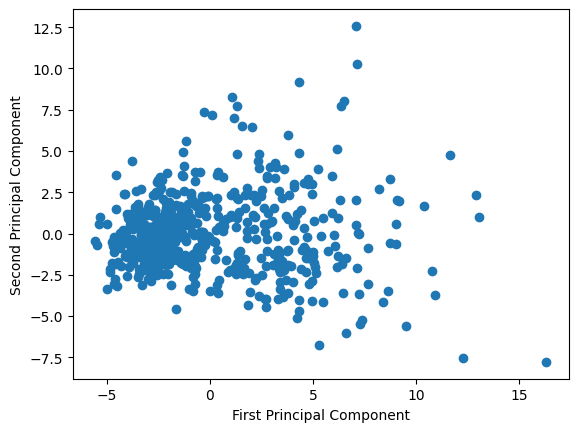

In [16]:
plt.scatter(x_model[:, 0], x_model[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

The gnerated visualization above shows each data point as a function of the principal components.

Let's modify the scatterplot to add a color scheme. Each data point is colored depending on whether
it represents a *benign* or *malignant* tumor.

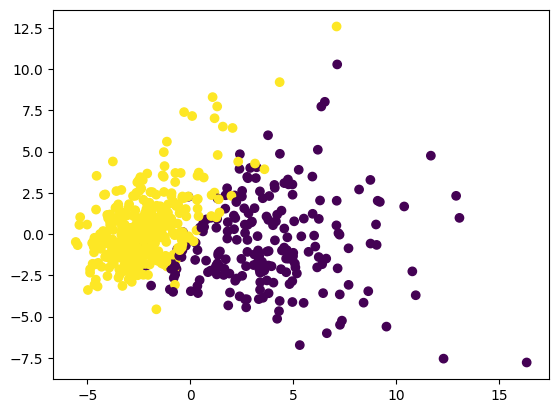

In [17]:
plt.scatter(x_model[:, 0], x_model[:, 1], c = raw_data['target'])